# 1. Import Data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv('./datasets/train.csv')

C:\Users\daphn\AppData\Local\Temp\ipykernel_18240\2919597480.py:1: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./datasets/train.csv')


In [ ]:
df_test = pd.read_csv('./datasets/test.csv')

# 2. EDA

In [81]:
df.shape

(150634, 78)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

In [83]:
pd.set_option('display.max_columns', None)

In [84]:
df.head(2)

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.76,701.928238,15,25,2005,Y,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,NaN,NaN,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.31154,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.32,475.230826,34,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,NaN,1.0,3.0,640.151925,NaN,1.0,7.0,80,77,903.659703,Bishan,1,1,1.35058,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892


#### Plot Median Resale Prices:

In [142]:
df['resale_price'].describe()

count    1.506340e+05
mean     4.491615e+05
std      1.433076e+05
min      1.500000e+05
25%      3.470000e+05
50%      4.200000e+05
75%      5.200000e+05
max      1.258000e+06
Name: resale_price, dtype: float64

<AxesSubplot:xlabel='resale_price'>

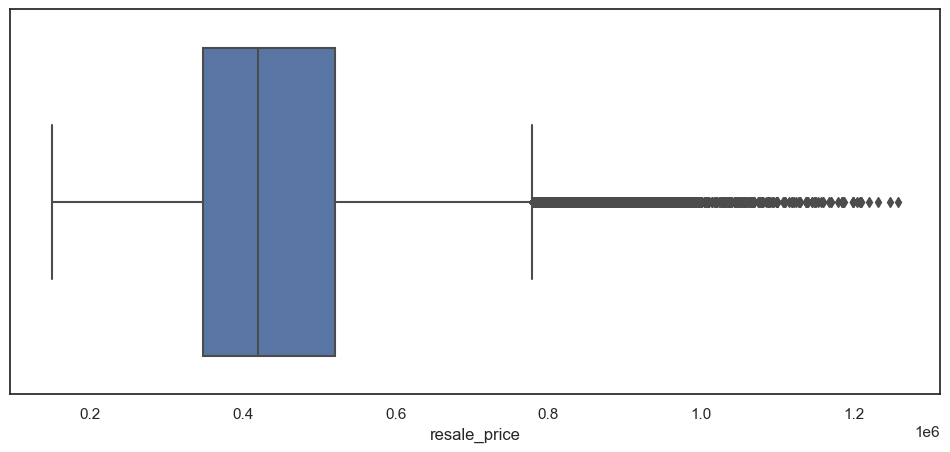

In [138]:
plt.figure(figsize = (12,5))
sns.boxplot(data=df, x='resale_price')

<AxesSubplot:xlabel='resale_price', ylabel='Count'>

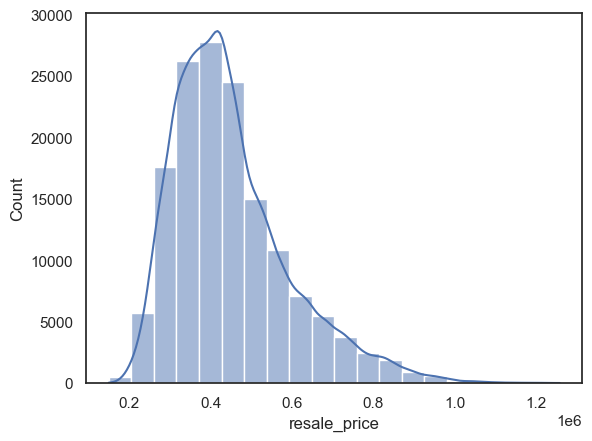

In [145]:
sns.histplot(data=df['resale_price'], bins=20, kde=True)

Text(0.5, 1.0, 'HDB Median Resale Price Overview')

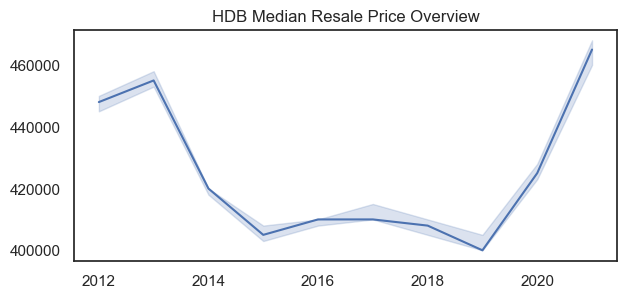

In [85]:
plt.figure(figsize = (7, 3))
sns.lineplot(x='Tranc_Year', y='resale_price', estimator='median', data=df).set(xlabel=None, ylabel=None)
plt.title('HDB Median Resale Price Overview')

- The dip of price in 2013 was mainly due to the cooling measures by the government. ([Source](https://www.homequarters.com.sg/2020/06/03/2013-the-fateful-year-that-caused-hdb-prices-to-plunge-10/))

#### Plot Resale Prices by Flat Type:

In [86]:
import joypy

Text(0.5, 1.0, 'HDB Resale Price by Flat Type')

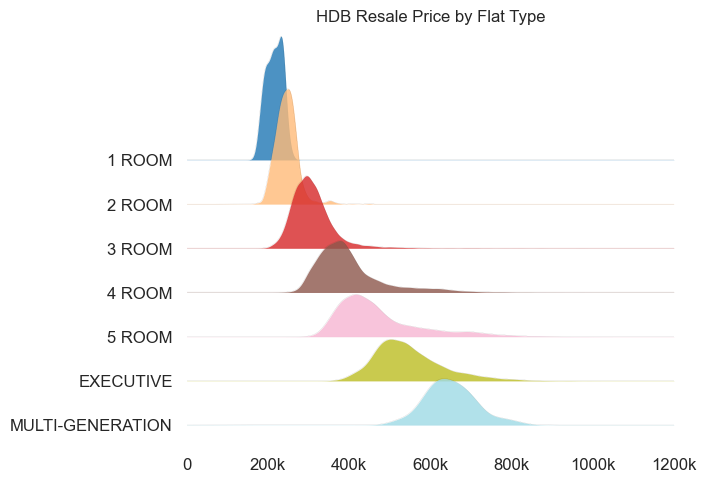

In [87]:
fig, axes = joypy.joyplot(df, by='flat_type', column='resale_price',figsize=(7,5),
             linewidth=0.05,overlap=1.3,alpha=0.8,colormap=plt.cm.get_cmap('tab20',7))
axes[-1].set_xlim([0,1200000])
axes[-1].set_xticklabels(['0', '200k', '400k', '600k', '800k', '1000k', '1200k','1400k']) 
plt.title('HDB Resale Price by Flat Type')

- It is observed that resale price increases with the number of rooms.

#### Plot Resale Prices by Town:

In [88]:
by_town = df.groupby(['town'])['resale_price'].median().reset_index()

Text(0.0, 1.0, 'HDB Resale Price by Town')

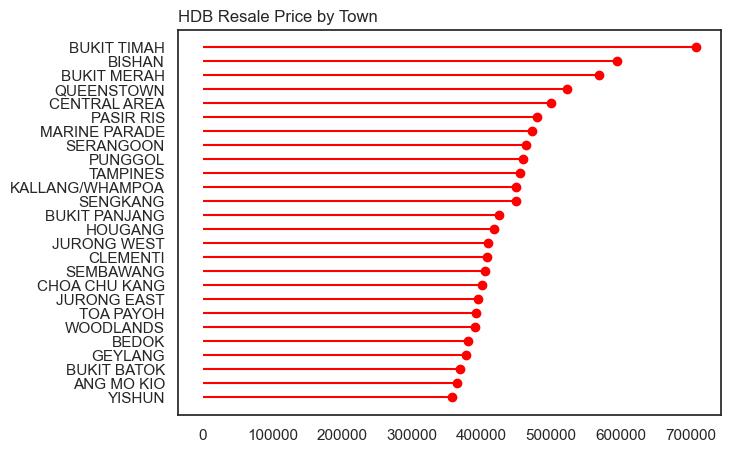

In [89]:
fig = plt.figure(figsize=(7,5))

ordered_price = by_town.sort_values(by='resale_price')
my_range=range(1,len(by_town.index)+1)
 
plt.hlines(y=my_range, xmin=0, xmax=ordered_price['resale_price'], color='red')
plt.plot(ordered_price['resale_price'], my_range, 'o', color='red')
 
plt.yticks(my_range, ordered_price['town'])
plt.title("HDB Resale Price by Town", loc='left')

- This graph shows the median resale prices of all room types. It might be clearer just to look at 4-room HDB resale prices by towns.
- We will be using this 4-room data to illustrate the relationship between other features and the resale prices. 

In [90]:
df_4rm = df.loc[df['flat_type'] == '4 ROOM']

In [91]:
by_town_4rm = df_4rm.groupby(['town'])['resale_price'].median().reset_index()

Text(0.0, 1.0, '4-ROOM HDB Resale Price by Town')

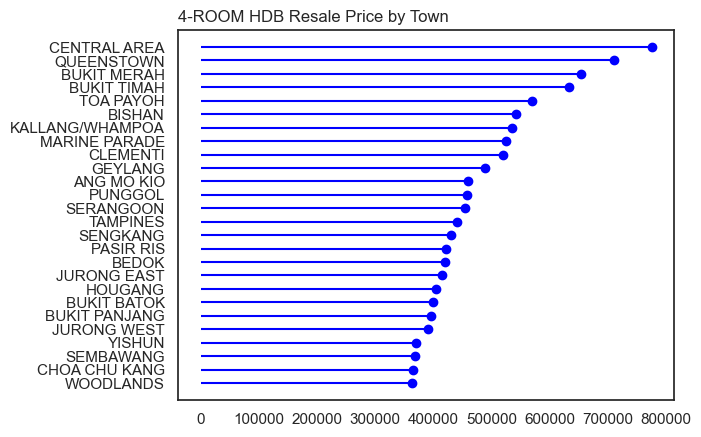

In [92]:
ordered_price_4rm = by_town_4rm.sort_values(by='resale_price')
my_range_4rm=range(1,len(by_town_4rm.index)+1)
 
plt.hlines(y=my_range_4rm, xmin=0, xmax=ordered_price_4rm['resale_price'], color='blue')
plt.plot(ordered_price_4rm['resale_price'], my_range_4rm, 'o',color='blue')
 
plt.yticks(my_range_4rm, ordered_price_4rm['town'])
plt.title("4-ROOM HDB Resale Price by Town", loc='left')

#### Plot Resale Prices by Floor Area:

In [93]:
df['floor_area_sqm'].describe()

count    150634.00000
mean         97.19763
std          24.40304
min          31.00000
25%          75.00000
50%          95.00000
75%         112.00000
max         280.00000
Name: floor_area_sqm, dtype: float64

Text(1.0, 1.0, 'HDB Resale Price by Floor Area in sqm')

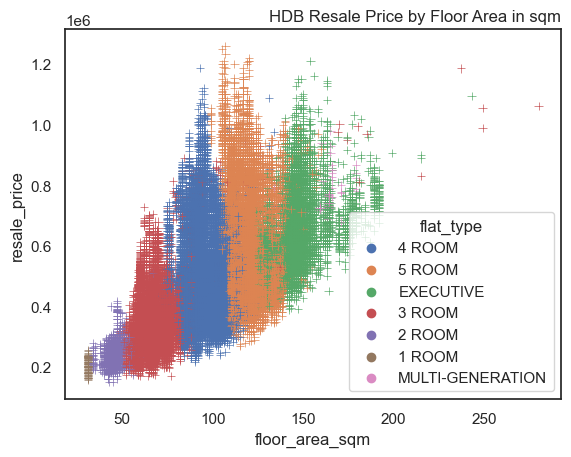

In [94]:
sns.scatterplot(x='floor_area_sqm', y='resale_price', data=df, hue='flat_type', legend='brief', marker='+', label=None)
plt.title("HDB Resale Price by Floor Area in sqm", loc='right')

- It is observed that HDB resale prices are higher for larger flats.

#### Plot Resale Prices by Storey:

In [95]:
by_storey = df_4rm.groupby(['storey_range'])['resale_price'].median().reset_index()

In [96]:
by_storey['storey_range'].unique()

array(['01 TO 03', '01 TO 05', '04 TO 06', '06 TO 10', '07 TO 09',
       '10 TO 12', '11 TO 15', '13 TO 15', '16 TO 18', '16 TO 20',
       '19 TO 21', '21 TO 25', '22 TO 24', '25 TO 27', '26 TO 30',
       '28 TO 30', '31 TO 33', '31 TO 35', '34 TO 36', '36 TO 40',
       '37 TO 39', '40 TO 42', '43 TO 45', '46 TO 48', '49 TO 51'],
      dtype=object)

Text(1.0, 1.0, 'HDB Resale Price by Storey')

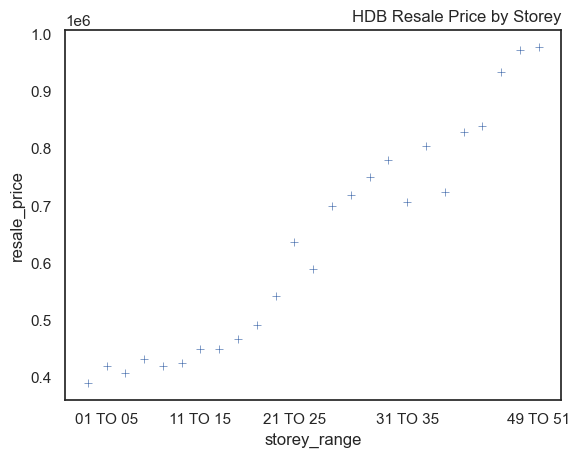

In [97]:
sns.scatterplot(x='storey_range', y='resale_price', data=by_storey, legend='brief', marker='+', label=None)
plt.xticks(['01 TO 05', 
            '11 TO 15', 
            '21 TO 25',
            '31 TO 35', 
            '49 TO 51'])
plt.title("HDB Resale Price by Storey", loc='right')

#### Plot Resale Prices by Model Type:

In [98]:
by_model = df_4rm.groupby(['flat_model'])['resale_price'].median().sort_values().reset_index()

[Text(0, 0, 'Model A2'),
 Text(1, 0, 'Simplified'),
 Text(2, 0, 'New Generation'),
 Text(3, 0, 'Model A'),
 Text(4, 0, 'Improved'),
 Text(5, 0, 'Standard'),
 Text(6, 0, 'Premium Apartment'),
 Text(7, 0, 'Adjoined flat'),
 Text(8, 0, 'DBSS'),
 Text(9, 0, 'Terrace'),
 Text(10, 0, 'Premium Apartment Loft'),
 Text(11, 0, 'Type S1')]

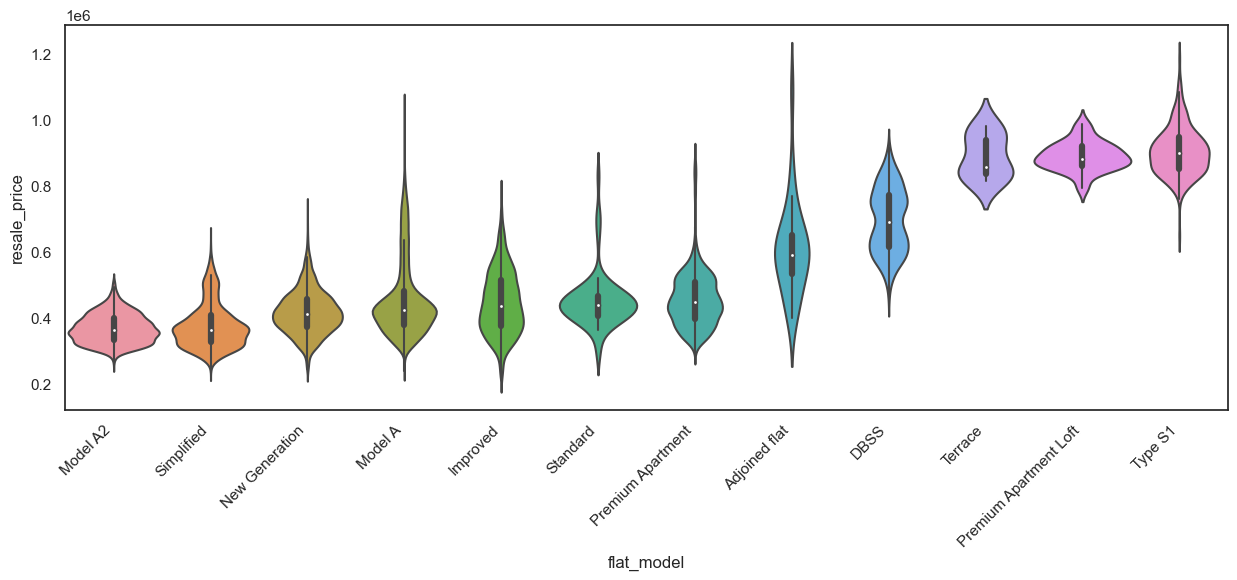

In [99]:
plt.figure(figsize=(15,5))
fig = sns.violinplot(x='flat_model', y='resale_price', order = by_model['flat_model'], data=df_4rm, width=1)
fig.set_xticklabels(labels=by_model['flat_model'],rotation=45, ha='right')

#### Plot Resale Prices By Distance to Nearest Amenities

<AxesSubplot:xlabel='Mall_Nearest_Distance', ylabel='resale_price'>

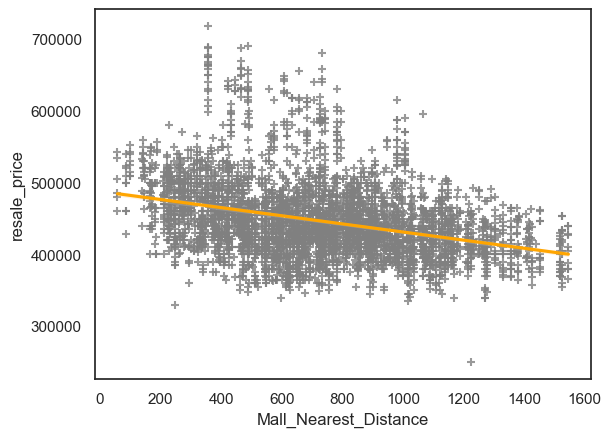

In [100]:
sns.regplot(x='Mall_Nearest_Distance', y='resale_price', data=df_4rm.loc[df_4rm['town']=='TAMPINES'], marker = '+', fit_reg =True, 
            scatter_kws={'color': 'grey'}, line_kws={'color': 'orange'}, label=None)

#### Plot Resale Prices By HDB Age

<AxesSubplot:xlabel='hdb_age', ylabel='resale_price'>

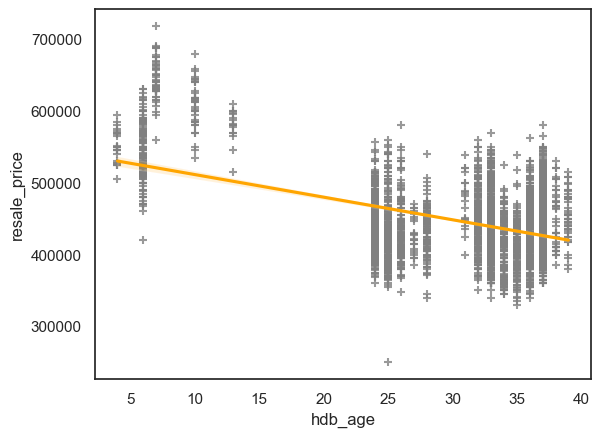

In [101]:
sns.regplot(x='hdb_age', y='resale_price', data=df_4rm.loc[df_4rm['town']=='TAMPINES'], marker = '+', fit_reg =True, 
            scatter_kws={'color': 'grey'}, line_kws={'color': 'orange'}, label=None)

# 3. Data Cleaning

#### Clean up known and unknown dataset concurrently, to ensure the data formats are aligned.

In [ ]:
df.shape

In [104]:
df.head(2)

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.76,701.928238,15,25,2005,Y,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,NaN,NaN,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.31154,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.32,475.230826,34,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,NaN,1.0,3.0,640.151925,NaN,1.0,7.0,80,77,903.659703,Bishan,1,1,1.35058,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892


#### Check Missing Values:

In [106]:
pd.set_option('display.max_rows', None)

In [107]:
df.isnull().sum()

id                               0
Tranc_YearMonth                  0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm                   0
flat_model                       0
lease_commence_date              0
resale_price                     0
Tranc_Year                       0
Tranc_Month                      0
mid_storey                       0
lower                            0
upper                            0
mid                              0
full_flat_type                   0
address                          0
floor_area_sqft                  0
price_per_sqft                   0
hdb_age                          0
max_floor_lvl                    0
year_completed                   0
residential                      0
commercial                       0
market_hawker                    0
multistorey_carpark              0
precinct_pavilion   

<AxesSubplot:>

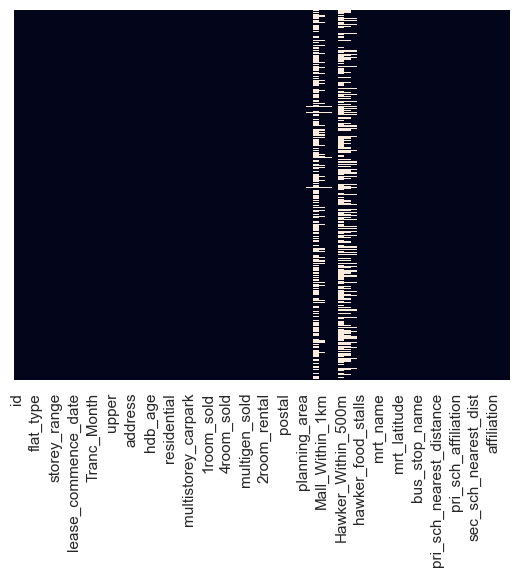

In [108]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

<AxesSubplot:>

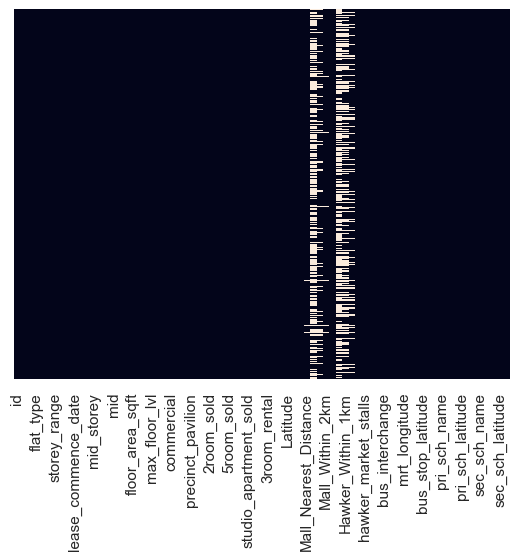

In [109]:
sns.heatmap(df_test.isnull(),yticklabels=False, cbar=False)

- From the heatmap, it is observed that the missing values for both train and test datasets are concentrated withan a few features.

In [110]:
df_null = pd.DataFrame(data=df.isnull().sum(), columns=['null_count'])
df_null['null_percent'] = df_null['null_count'].map(lambda x: round((x/len(df))*100,1))

In [111]:
df_pred_null = pd.DataFrame(data=df_pred.isnull().sum(), columns=['null_count'])
df_pred_null['null_percent'] = df_pred_null['null_count'].map(lambda x: round((x/len(df_test))*100,1))

https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/s12874-017-0442-1#:~:text=If%20there%20are%20significant%20missingness,the%20baseline%20variable%20is%20missing.

#### Drop Features with more than 40% missing values:

In [112]:
df_null.loc[df_null['null_percent']>40]

,null_count,null_percent
Mall_Within_500m,92789,61.6
Hawker_Within_500m,97390,64.7
Hawker_Within_1km,60868,40.4


In [113]:
df_pred_null.loc[df_test_null['null_percent']>40]

,null_count,null_percent
Mall_Within_500m,10292,61.5
Hawker_Within_500m,10755,64.3
Hawker_Within_1km,6729,40.2


In [114]:
df.drop(columns= ['Mall_Within_500m', 'Hawker_Within_500m', 'Hawker_Within_1km'], axis=1, inplace=True)

In [115]:
df_pred.drop(columns= ['Mall_Within_500m', 'Hawker_Within_500m', 'Hawker_Within_1km'], axis=1, inplace=True)

#### Handle Features with less than 40% missing values:

In [116]:
df_null = pd.DataFrame(data=df.isnull().sum(), columns=['null_count'])
df_null['null_percent'] = df_null['null_count'].map(lambda x: round((x/len(df))*100,1))

In [117]:
df_null.loc[df_null['null_percent']>0]

,null_count,null_percent
Mall_Nearest_Distance,829,0.6
Mall_Within_1km,25426,16.9
Mall_Within_2km,1940,1.3
Hawker_Within_2km,29202,19.4


In [118]:
df_pred_null = pd.DataFrame(data=df_pred.isnull().sum(), columns=['null_count'])
df_pred_null['null_percent'] = df_pred_null['null_count'].map(lambda x: round((x/len(df_test))*100,1))

In [119]:
df_pred_null.loc[df_pred_null['null_percent']>0]

,null_count,null_percent
Mall_Nearest_Distance,84,0.5
Mall_Within_1km,2786,16.6
Mall_Within_2km,213,1.3
Hawker_Within_2km,3254,19.4


#### Drop the features (columns) 'Mall_Within_1km', 'Mall_Within_2km', 'Hawker_Within_2km' as they do not seem relevant and the null precentage is relatively high as well.

In [120]:
df.drop(columns= ['Mall_Within_1km', 'Mall_Within_2km', 'Hawker_Within_2km'], axis=1, inplace=True)

In [121]:
df_pred.drop(columns= ['Mall_Within_1km', 'Mall_Within_2km', 'Hawker_Within_2km'], axis=1, inplace=True)

- However, Mall_Nearest_Distance looks more relavant in predicting the house price. Let's see if imputation is able to help us keep the data although the null percentage is very low.

Text(0.5, 1.0, 'Distribution of Distance to Nearest Mall')

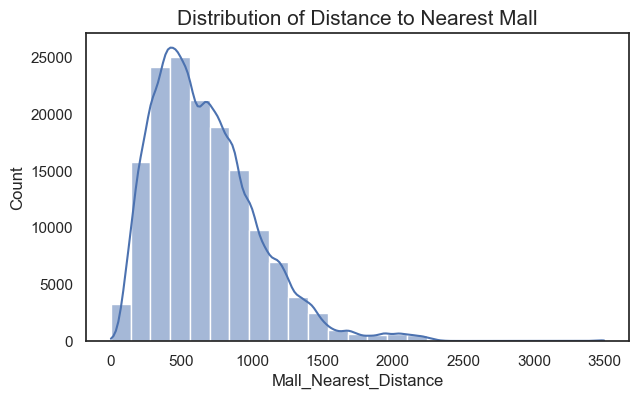

In [122]:
plt.figure(figsize = (7, 4))
sns.set(style="white")
sns.histplot(data=df, x='Mall_Nearest_Distance', bins =25, kde=True)
plt.title('Distribution of Distance to Nearest Mall', fontsize=15)

In [123]:
df['Mall_Nearest_Distance'].describe()

count    149805.000000
mean        664.239826
std         368.739209
min           0.000000
25%         391.473823
50%         602.818388
75%         868.818288
max        3496.402910
Name: Mall_Nearest_Distance, dtype: float64

- From the distribution of the data, we notice the range of data spread is pretty wide and single imputation may not be feasible in this case.
- In this case, we will impute the missing rows using median value.

In [124]:
df['Mall_Nearest_Distance'] = df['Mall_Nearest_Distance'].fillna(df['Mall_Nearest_Distance'].median())

In [125]:
df_pred['Mall_Nearest_Distance'] = df_pred['Mall_Nearest_Distance'].fillna(df_pred['Mall_Nearest_Distance'].median())

In [126]:
df.shape

(150634, 72)

In [127]:
df_pred.shape

(16737, 71)

# 4. Feature Selection

#### Drop Irrelevant/Repeated/Redundant Features

In [128]:
df.columns

Index(['id', 'Tranc_YearMonth', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'resale_price', 'Tranc_Year', 'Tranc_Month', 'mid_storey', 'lower',
       'upper', 'mid', 'full_flat_type', 'address', 'floor_area_sqft',
       'price_per_sqft', 'hdb_age', 'max_floor_lvl', 'year_completed',
       'residential', 'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold',
       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'postal', 'Latitude', 'Longitude', 'planning_area',
       'Mall_Nearest_Distance', 'Hawker_Nearest_Distance',
       'hawker_food_stalls', 'hawker_market_stalls', 'mrt_nearest_distance',
       'mrt_name', 'bus_interchange', 'mrt_interchange', 'mrt_latitude',
       'mrt_longitude', 

In [132]:
df.head(2)

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Hawker_Nearest_Distance,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.76,701.928238,15,25,2005,Y,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,154.753357,84,60,330.083069,Kallang,0,0,1.31154,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.32,475.230826,34,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,640.151925,80,77,903.659703,Bishan,1,1,1.35058,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892


In [151]:
df['3room_rental'].value_counts()

0     146805
1       2618
2        544
3        175
7        108
4         99
5         84
17        39
12        37
13        36
24        33
14        24
15        22
10         9
23         1
Name: 3room_rental, dtype: int64

- Drop data leakage feature: 'price_per_sqft'
- Drop features that have no/less impact on resale prices: 'id', 'max_floor_lvl', 'multistorey_carpark', 'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold',	'3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold', 'studio_apartment_sold','planning_area', 'hawker_food_stalls', 'hawker_market_stalls', 'mrt_name', 'pri_sch_name', 'vacancy',	'pri_sch_affiliation', 'sec_sch_name', 'cutoff_point', 'affiliation'
- Drop locational features with numerical values: 'full_flat_type', 'address', 'postal', 'Latitude', 'Longitude', 'mrt_latitude', 'mrt_longitude','bus_stop_latitude', 'bus_stop_longitude', 'pri_sch_latitude', 'pri_sch_longitude', 'sec_sch_latitude', 'sec_sch_longitude'.
- Drop redundant features: 'floor_area_sqft' (while keeping 'floor_area_sqm'), 'Tranc_Month' and 'Tranc_YearMonth' (while keeping 'Tranc_Year'), 'residential', 'commercial', drop 'lower', 'upper', 'mid' (while keeping 'mid_storey'), 'full_flat_type' (while keeping 'flat_type', 'flat_model'), 'hdb_age' (while keeping 'lease_commence_date')
- Drop features with insufficient value counts: '1room_rental',	'2room_rental',	'3room_rental',	'other_room_rental'

In [ ]:
df.drop(columns = ['id', 'Tranc_YearMonth','Tranc_Month', 'lower',
       'upper', 'mid', 'full_flat_type', 'block', 'street_name', 'storey_range', 'address', 'floor_area_sqft',
       'price_per_sqft', 'hdb_age', 'max_floor_lvl', 'year_completed',
       'residential', 'commercial', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold',
       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'postal', 'Latitude', 'Longitude', 'planning_area',
       'hawker_food_stalls', 'hawker_market_stalls',
       'mrt_name', 'mrt_latitude',
       'mrt_longitude', 'bus_stop_name',
       'bus_stop_latitude', 'bus_stop_longitude',
       'pri_sch_name', 'vacancy', 'pri_sch_affiliation', 'pri_sch_latitude',
       'pri_sch_longitude', 'sec_sch_nearest_dist', 'sec_sch_name',
       'cutoff_point', 'affiliation', 'sec_sch_latitude', 'sec_sch_longitude'], axis=1, inplace=True )

In [167]:
df.drop(columns=['block', 'street_name', 'storey_range'], axis=1, inplace=True)

In [168]:
df_pred.drop(columns=['block', 'street_name', 'storey_range'], axis=1, inplace=True)

In [170]:
len(df.columns)

16

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   town                       150634 non-null  object 
 1   flat_type                  150634 non-null  object 
 2   floor_area_sqm             150634 non-null  float64
 3   flat_model                 150634 non-null  object 
 4   lease_commence_date        150634 non-null  int64  
 5   resale_price               150634 non-null  float64
 6   Tranc_Year                 150634 non-null  int64  
 7   mid_storey                 150634 non-null  int64  
 8   market_hawker              150634 non-null  object 
 9   Mall_Nearest_Distance      150634 non-null  float64
 10  Hawker_Nearest_Distance    150634 non-null  float64
 11  mrt_nearest_distance       150634 non-null  float64
 12  bus_interchange            150634 non-null  int64  
 13  mrt_interchange            15

In [163]:
df_pred.drop(columns = ['id', 'Tranc_YearMonth','Tranc_Month', 'lower',
       'upper', 'mid', 'full_flat_type','block', 'street_name', 'storey_range', 'address', 'floor_area_sqft',
       'price_per_sqft', 'hdb_age', 'max_floor_lvl', 'year_completed',
       'residential', 'commercial', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold',
       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'postal', 'Latitude', 'Longitude', 'planning_area',
       'hawker_food_stalls', 'hawker_market_stalls',
       'mrt_name', 'mrt_latitude',
       'mrt_longitude', 'bus_stop_name',
       'bus_stop_latitude', 'bus_stop_longitude',
       'pri_sch_name', 'vacancy', 'pri_sch_affiliation', 'pri_sch_latitude',
       'pri_sch_longitude', 'sec_sch_nearest_dist', 'sec_sch_name',
       'cutoff_point', 'affiliation', 'sec_sch_latitude', 'sec_sch_longitude'], axis=1, inplace=True )

# 5. Preprocessing

- Categorical features (nominal and ordinal) will be converted into some numerical representation by the means of One Hot Encoding (binarize the category into an array of 1 and 0 to represent the feature) or Ordinal Encoding (convert category to numerical values which retains the order of category).

In [ ]:
df['market_hawker'].value_counts()

N    150619
Y        15
Name: market_hawker, dtype: int64

In [175]:
df['market_hawker'] = [1 if i=='Y' else 0 for i in df['market_hawker']]

In [178]:
df= pd.get_dummies(df, columns=['town', 'flat_type', 'flat_model'], drop_first=True)

In [179]:
df.columns

Index(['floor_area_sqm', 'lease_commence_date', 'resale_price', 'Tranc_Year',
       'mid_storey', 'market_hawker', 'Mall_Nearest_Distance',
       'Hawker_Nearest_Distance', 'mrt_nearest_distance', 'bus_interchange',
       'mrt_interchange', 'bus_stop_nearest_distance',
       'pri_sch_nearest_distance', 'town_BEDOK', 'town_BISHAN',
       'town_BUKIT BATOK', 'town_BUKIT MERAH', 'town_BUKIT PANJANG',
       'town_BUKIT TIMAH', 'town_CENTRAL AREA', 'town_CHOA CHU KANG',
       'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST',
       'town_JURONG WEST', 'town_KALLANG/WHAMPOA', 'town_MARINE PARADE',
       'town_PASIR RIS', 'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG',
       'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH',
       'town_WOODLANDS', 'town_YISHUN', 'flat_type_2 ROOM', 'flat_type_3 ROOM',
       'flat_type_4 ROOM', 'flat_type_5 ROOM', 'flat_type_EXECUTIVE',
       'flat_type_MULTI-GENERATION', 'flat_model_Adjoined flat',
     

In [180]:
df_pred['market_hawker'] = [1 if i=='Y' else 0 for i in df_test['market_hawker']]

In [182]:
df_pred= pd.get_dummies(df_test, columns=['town', 'flat_type', 'flat_model'], drop_first=True)

# 6. Modelling

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [ ]:
X = df.drop(columns=['resale_price'], axis=1, inplace=True)
y = df['resale_price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [187]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('lr', LinearRegression())
])

# 7. Evaluation